# Tratamento dos dados


## Bibliotecas utilizadas

In [1]:
import re
import os
from langdetect import detect
from langdetect import detect_langs

# Gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.utils import deaccent

import os

import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
EXEMPLO DE UMA DOCUMENTO BRUTO

Leonardo Assad Aoun comentou em: 02/01/2019 22:05
 
Café: Bolsa de Nova York recua mais de 100 pts nesta tarde de 4ª feira com oferta e petróleo
 
Os contratos futuros do café arábica na Bolsa de Nova York (ICE Futures US) operam com queda de cerca de 100 pontos nest
a tarde de quarta-feira (02). O mercado externo do grão estende perdas ainda de olho na oferta global do grão e acompanh
ando o petróleo.
Por volta das 12h51 (horário de Brasília), o vencimento março/19 operava com queda de 135 pontos, a 100,50 cents/lb e o
maio/19 anotava 103,65 cents/lb com baixa de 130 pontos. Já o julho/19 tinha desvalorização de 140 pontos, a 106,40 cent
s/lb.
O mercado externo do arábica estende as perdas dos últimos dias ainda de olho nas informações otimistas sobre a oferta g
lobal de café. A safra 2018/19 de café do Brasil foi estimada em mais de 60 milhões de sacas, favorecendo o abasteciment
o global.
A Conab (Companhia Nacional de Abastecimento) estimou a safra brasileira em 61,7 milhões de sacas de 60 kg. Um recorde q
ue supera em cerca de 10 milhões de sacas o melhor desempenho até então, em 2016. Outras estimativas apontam números par
ecidos.
"O bom resultado deve-se às condições climáticas favoráveis, proporcionando boas floradas, à melhoria do pacote tecnológ
ico, com o uso de variedades mais produtivas como as plantas clonais em Rondônia e Mato Grosso, além da bienalidade posi
tiva, sobretudo em lavouras da espécie arábica", disse a companhia.
No Brasil, no último fechamento, o tipo 6 duro era negociado a R$ 423,00 a saca de 60 kg em Guaxupé (MG) e em Poços de C
aldas (MG) estavam valendo R$ 385,00.
» Clique e veja as cotações completas do café
Por: Jhonatas Simião
Fonte: Notícias Agrícolas


Visualizar |
|   Comentar   
  |  

  
"""

'\nEXEMPLO DE UMA DOCUMENTO BRUTO\n\nLeonardo Assad Aoun comentou em: 02/01/2019 22:05\n\xa0\nCafé: Bolsa de Nova York recua mais de 100 pts nesta tarde de 4ª feira com oferta e petróleo\n\xa0\nOs contratos futuros do café arábica na Bolsa de Nova York (ICE Futures US) operam com queda de cerca de 100 pontos nest\na tarde de quarta-feira (02). O mercado externo do grão estende perdas ainda de olho na oferta global do grão e acompanh\nando o petróleo.\nPor volta das 12h51 (horário de Brasília), o vencimento março/19 operava com queda de 135 pontos, a 100,50 cents/lb e o\nmaio/19 anotava 103,65 cents/lb com baixa de 130 pontos. Já o julho/19 tinha desvalorização de 140 pontos, a 106,40 cent\ns/lb.\nO mercado externo do arábica estende as perdas dos últimos dias ainda de olho nas informações otimistas sobre a oferta g\nlobal de café. A safra 2018/19 de café do Brasil foi estimada em mais de 60 milhões de sacas, favorecendo o abasteciment\no global.\nA Conab (Companhia Nacional de Abasteci

## Remoção de emojis

In [3]:
# função para remoção de emojis
# ref.: https://towardsdatascience.com/text-preprocessing-for-data-scientist-3d2419c8199d

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
#sememoji = remove_emoji("Hi, I am Emoji  😜")
#print("Hi, I am Emoji  😜")
#print(sememoji)


In [4]:
def remover_tags_html(texto):
    clean = re.compile('<.*?>')
    return re.sub(clean, ' ', texto)

def text_preprocess(sentences):
    sentences_ok = []
    for sent in sentences:
        # converte para minúsculas
        sent = sent.lower()
        
        # verifica se é linha cabeçalho - apagar
        # ex: Thiago Tavares Botelho comentou em: 25/05/2016 14:20 
        sent = re.sub('.+?comentou em: \d{2}\/.*','', sent)
        
        # Renove linhas co '|'   ex: Visualizar |
        sent = re.sub(r'.*?\|.*', '', sent)
        
        # Remove linhas em branco
        sent = sent.rstrip('\n')
        sent = re.sub(r'^\s*', '', sent)
        
        # Retira acentuação
        sent = deaccent(sent)
        
        # Remove Tags HTML
        sent = remover_tags_html(sent)  
    
        # Remove emails   
        sent = re.sub(r'[\w\.-]+@[\w\.-]+(\.[\w]+)+', ' ', sent, flags=re.MULTILINE)  
        
        # Remove URLs http
        sent = re.sub('http[s]?://\S+', '', sent)
        
        # Remove linhas com video embutido
        sent = re.sub('.*?navigator.*', '', sent)
        
        # Remove hostnames sites começando por www
        sent = re.sub('www\.\S+', '', sent)
        
        sent = re.sub('\(\s*?por\s+\)','', sent)
        
        if sent:
            for words, replacement in {'sao paulo':'sao_paulo', 
                                       'minas gerais':'minas_gerais',
                                       'rio de janeiro': 'rio_de_janeiro',
                                       'espirito santo':'espirito_santo',
                                       'eua':'estados_unidos',
                                       'estados unidos':'estados_unidos',
                                       'uniao europeia':'uniao_europeia',
                                       'cents/lb':'cents_libra',
                                       'bolsa de nova york':'bolsa_de_nova_york',
                                       'mercado futuro':'mercado_futuro',
                                       'nova york':'nova_york',
                                       'dolares':'dolar',
                                       'r$':'reais',
                                       'us$':'dolar',
                                       'us $':'dolar',
                                       '$':'dolar',
                                       'tonelada ':'toneladas ',
                                       'lavouras':'lavoura',
                                       'regioes':'regiao',
                                       'chuvas':'chuva',
                                       'sacas':'saca',
                                       'brasileiro':'brasileira',
                                       'produtos':'produto',
                                       'empresas':'empresa',
                                       'novas':'nova',
                                       'precos':'preco',
                                       'areas':'area',
                                       'melhores':'melhor',
                                       'exportacoes':'exportacao',
                                       'cafeicultores':'cafeicultor',
                                       'produtores':'produtor',
                                       'safras':'safra',
                                       'rurais':'rural',
                                       'anos':'ano',
                                       'meses':'mes',
                                       'tipos':'tipo',
                                       'periodos':'periodo',
                                       'cotacoes':'cotação',
                                      ' temperaturas': 'temperatura',
                                       'bebidas':'bebida'
                                 
                                      }.items():
                sent = sent.replace(words, replacement)
            
                
                # Unidades
                sent = re.sub(r'[bm]ilhoes', r'',sent)
                sent = re.sub(r'[bm]ilhao', r'',sent)
                
                #sent = re.sub(r' mil(?=\s|$)', r'',sent)
                sent = re.sub(r'\bmil\b', r'',sent)
                
                #dias da semana
                sent = re.sub(r'[\w]+-feira', r'',sent)
            
                # nomes frequentes
                sent = re.sub(r'rodrigo.*costa', r'',sent)

                # Remove emojis
                sent = remove_emoji(sent)
             
            # remove linhas com dados de autoria, referencias etc, como normalmente aparecem no início das linhas
            if not re.match('(?:autor|fonte|texto|fotografia|imagem|por|credito|hora|local|contato|telefone|horario|foto|data|video|endereco|via|www|quando|onde|tel|e-mail|publicado\sem)s*?:', sent):
                #se não tiver uma das palavras acima seguidas de ':'
                #se a linha não for vazia concatena o conteúdo
                if sent.strip() != "":
                    sent = re.sub(r'[^a-zA-Z_]',' ',sent)
                    sentences_ok.append(sent)
                # senão ignora

    return sentences_ok 

## Início

## Lê os dados brutos da raspagem, efetua limpeza e preparação

In [5]:
# Lê os arquivos dos documentos coletados da web 

data = []
path = "data/raspagem"
filecounter = 0
idiomas = []
# criando dicionario de ocorrencia de idiomas
idiomas_dict = {}

for file in os.listdir(path):
    fullpath = path + '/' + file
    filesize = os.path.getsize(fullpath)
    
    # Não considera arquivos  pequenos, geralmente publicação de videos
    if (file.endswith(".txt") and (filesize > 500)):
        with open(os.path.join(path, file), 'r', encoding='utf-8') as f:
            
            # Lê os arquivos para uma lista
            # print('Processando arquivo '+ file)
            textlines = f.readlines()
            
            # limpeza e reparacao dos textos
            textlines = text_preprocess(textlines)
            #print(textlines)
        
            # Verfica idioma
            documento_text = '\n'.join(textlines)
            try:
                lang = detect(documento_text)
                idiomas.append(lang)
            except:
                print('Erro de detecção linguagem em ' + file)
            if lang == 'pt':
                procfile = file.replace('scraping', 'processed')
                with open('data/processados/' + procfile, 'w', encoding='utf-8') as preparedf:
                    preparedf.write(documento_text)
                    filecounter = filecounter + 1
                    #print('Gravado documento processado n.o ' + str(filecounter) + ' em ' + file)
            else:
                print('Documento em ' + lang + ' em ' + file + '-> descartado ----------------------------------------')
                idiomas.append(lang)

Documento em en em rsc_scraping_2007_04_16_09h02_id_3895.txt-> descartado ----------------------------------------
Documento em en em rsc_scraping_2007_05_21_09h56_id_4327.txt-> descartado ----------------------------------------
Documento em en em rsc_scraping_2007_05_28_15h23_id_4445.txt-> descartado ----------------------------------------
Documento em en em rsc_scraping_2007_07_06_11h13_id_4977.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2007_07_17_14h33_id_5137.txt-> descartado ----------------------------------------
Documento em en em rsc_scraping_2007_08_09_13h42_id_5435.txt-> descartado ----------------------------------------
Documento em en em rsc_scraping_2007_08_15_13h30_id_5484.txt-> descartado ----------------------------------------
Documento em en em rsc_scraping_2007_10_02_15h06_id_6011.txt-> descartado ----------------------------------------
Documento em en em rsc_scraping_2007_11_19_13h25_id_6648.txt-> descartado ------

Documento em es em rsc_scraping_2012_06_26_06h57_id_39878.txt-> descartado ----------------------------------------
Documento em en em rsc_scraping_2012_06_26_09h09_id_39882.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2012_07_04_13h59_id_40117.txt-> descartado ----------------------------------------
Documento em en em rsc_scraping_2012_08_16_19h58_id_41269.txt-> descartado ----------------------------------------
Documento em en em rsc_scraping_2012_08_21_07h04_id_41358.txt-> descartado ----------------------------------------
Documento em en em rsc_scraping_2012_10_05_08h39_id_42407.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2012_10_24_15h02_id_42807.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2012_11_12_13h56_id_43214.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2012_11_26_18h16_id_43506.txt-> descarta

Documento em es em rsc_scraping_2014_11_03_08h22_id_54318.txt-> descartado ----------------------------------------
Documento em en em rsc_scraping_2014_11_06_21h22_id_54372.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2014_11_10_08h52_id_54388.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2014_11_10_20h09_id_54404.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2014_11_12_13h21_id_54424.txt-> descartado ----------------------------------------
Documento em en em rsc_scraping_2014_11_23_11h21_id_54513.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2014_11_24_09h52_id_54516.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2014_12_03_08h37_id_54604.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2014_12_04_16h45_id_54621.txt-> descarta

Documento em es em rsc_scraping_2017_03_13_13h06_id_66513.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2017_03_19_17h22_id_66656.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2017_03_24_05h47_id_66786.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2017_03_29_10h02_id_66888.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2017_04_03_08h08_id_66974.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2017_04_05_12h41_id_67054.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2017_04_17_06h40_id_67280.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2017_04_17_06h48_id_67281.txt-> descartado ----------------------------------------
Documento em en em rsc_scraping_2017_04_19_05h32_id_67337.txt-> descarta

Documento em es em rsc_scraping_2019_03_15_10h27_id_78738.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2019_03_28_08h42_id_78983.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2019_04_02_06h00_id_79059.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2019_04_07_11h28_id_79180.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2019_06_13_09h31_id_80263.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2019_06_20_12h12_id_80357.txt-> descartado ----------------------------------------
Documento em en em rsc_scraping_2019_06_24_10h58_id_80379.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2019_07_03_17h58_id_80525.txt-> descartado ----------------------------------------
Documento em en em rsc_scraping_2019_07_31_10h09_id_80901.txt-> descarta

Documento em es em rsc_scraping_2020_04_27_10h26_id_84564.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2020_04_27_10h29_id_84565.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2020_05_11_11h51_id_84801.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2020_05_18_11h15_id_84907.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2020_05_18_11h17_id_84908.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2020_05_18_11h30_id_84909.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2020_05_18_11h53_id_84910.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2020_05_29_11h00_id_85149.txt-> descartado ----------------------------------------
Documento em es em rsc_scraping_2020_05_29_11h05_id_85150.txt-> descarta

In [6]:
# sumarizando ocorrências dos idiomas inferidos dos documento
for idioma in range(len(idiomas)):
    idiomas_dict[idiomas[idioma]] = idiomas.count(idiomas[idioma])

# vendo o dicionario de ocorrências
print(idiomas_dict)

{'pt': 46767, 'en': 224, 'es': 584, 'it': 14, 'ca': 10, 'fr': 14, 'sv': 2, 'no': 2}


In [10]:
# Cria um histograma formatado em caracteres
# modif. de https://gist.github.com/tammoippen
def crappyhist(a, bins=50, width=140):
    h, b = np.histogram(a, bins)
    total_h = np.sum(h)
    total= 0
    for i in range (0, bins):
        total = total + h[i]
        print('{:12.0f}  | {:{width}s} {} {} {:%}'.format(
            b[i], 
            '#'*int(width*h[i]/np.amax(h)), 
            h[i],
            int(total),
            total/total_h,
            width=width))
    print('{:12.0f}  | '.format(b[bins]))

In [11]:
# Levantamento de tamanho dos arquivos resultantes

results = []
path = 'data/processados'
filenames = os.listdir(path)
for filename in [f for f in filenames if f.endswith('.txt')]: 
    fullpath = path + '/' + filename
    results.append(os.path.getsize(fullpath))
#converte resultado para um numpy array
np_results = np.array(results)

In [13]:
# Mostra histograma em formato caracter
crappyhist(np_results, bins=100, width=40)

           0  | ##################                       4886 4886 10.447314%
         782  | ######################################## 10819 15705 33.580653%
        1565  | #####################################    10253 25958 55.503763%
        2347  | ##########################               7302 33260 71.117003%
        3129  | ##################                       4991 38251 81.788830%
        3912  | ###########                              3150 41401 88.524205%
        4694  | ######                                   1889 43290 92.563291%
        5477  | ####                                     1097 44387 94.908912%
        6259  | ##                                       701 45088 96.407800%
        7041  | #                                        458 45546 97.387102%
        7824  | #                                        343 45889 98.120510%
        8606  |                                          235 46124 98.622990%
        9388  |                                        

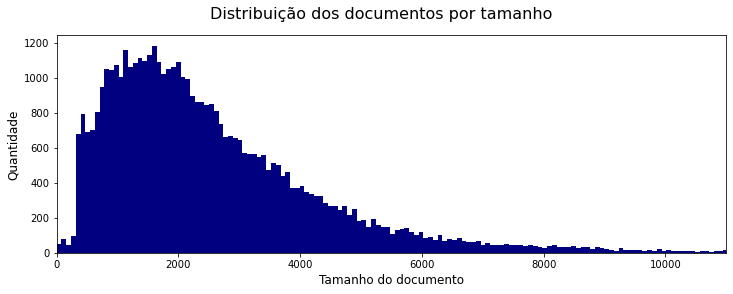

In [14]:
# Geração do histograma

plt.figure(figsize=(12,4))
plt.hist(np_results, bins = 1000, color='navy')
plt.suptitle('Distribuição dos documentos por tamanho', fontsize=16)
plt.xlabel('Tamanho do documento', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xlim(xmin=0, xmax = 11000)
plt.show()


## Fim
